**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo (Gabriel Olímpio Rocha Leão, Geovanny Magalhães Novais)

---


Analista de dados: Geovanny Magalhães Novais

---

Engenheiro(a) do conhecimento: Gabriel Olímpio Rocha Leão

---


#Algoritmos genéticos





Utilizando as bases de [dados sobre a alimentação](https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset), para identificar os diferentes tipos de alimentação que auxiliam no reforço contra a covid-19.



# Obtendo a base de dados

In [39]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [40]:
import pandas as pd

In [41]:
dados = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/unidos.csv')

# Carga dos dados

In [ ]:
kcal = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/Kcal.csv')
kcal = kcal.drop(columns=('Unnamed: 0'))
kcal

In [65]:
dados = dados.drop(columns=("Country"))
dados

,Unnamed: 0,Obesity,Confirmed,Deaths,Recovered,Active,Population,Undernourished,Alcoholic Beverages,Animal Products,...,Spices.3,Starchy Roots.3,Stimulants.3,Sugar Crops.3,Sugar & Sweeteners.3,Treenuts.3,Vegetal Products.3,Vegetable Oils.3,Vegetables.3,Miscellaneous.3
0,0,4.5,0.142134,0.006186,0.123374,0.012574,38928000.0,29.8,0.0000,21.6397,...,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462
1,1,22.3,2.967301,0.050951,1.792636,1.123714,2838000.0,6.2,0.0000,32.0002,...,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544
2,2,26.6,0.244897,0.006558,0.167572,0.070767,44357000.0,3.9,0.0000,14.4175,...,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399
3,3,6.8,0.061687,0.001461,0.056808,0.003419,32522000.0,25.0,0.0000,15.3041,...,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924
4,5,28.5,4.356147,0.108227,3.905192,0.342729,45377000.0,4.6,0.0000,30.3572,...,0.0292,1.3096,0.9688,0.0000,0.0049,0.0438,18.0176,0.0000,1.0516,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,165,25.2,0.452585,0.004287,0.424399,0.023899,28645000.0,21.2,0.0000,16.3261,...,0.0000,1.1195,0.3287,0.0000,0.0178,0.0000,27.4545,0.0533,1.0129,0.0267
150,166,2.1,0.002063,0.000036,0.001526,0.000501,96209000.0,9.3,0.0000,33.2484,...,0.5221,0.2333,0.5444,0.0167,0.0056,0.3277,29.5617,0.0000,3.7216,0.0389
151,167,14.1,0.007131,0.002062,0.004788,0.000282,29826000.0,38.9,0.0000,12.5401,...,0.0657,0.2066,0.3193,0.0000,0.0000,0.0188,39.9831,0.0000,0.5448,0.0564
152,168,6.5,0.334133,0.004564,0.290524,0.039045,18384000.0,46.7,0.0783,9.6005,...,0.0846,1.2863,0.0762,0.0000,0.0000,0.0000,40.1117,0.0000,0.8039,0.0592


* ?

# Implementação

In [43]:
!pip install geneticalgorithm

# Definição da função objetivo

In [66]:
qntd_variaveis=len(kcal.columns)
qntd_variaveis

23

In [67]:
kcal.columns

Index(['Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables'],
      dtype='object')

A nossa primeira parte da função objetivo será uma função linear sobre a quantidade de alimentos.

In [68]:
import numpy as np

#Gerando uma população aleatoriamente
np.random.seed(seed=2022) # Usar um seed para dar reprodutibilidade
pesos = np.random.rand(qntd_variaveis)

#Relacionando a população com os dados do dataset escolhido para a analise inicial.
#Faz o produto escalar entre os pesos dos alimentos e o peso da população gerada
def objetive_function(qnt_kcal):
    return np.dot(qnt_kcal, pesos)

In [69]:
print(len(kcal.columns))

23


# Definição do fitness

Podemos definir as retrições na tentativa de identificar uma métrica de fintness aplicada por meio de penalidades, ou seja, se o modelo desobedecer a restrição terá uma penalidade no valor de sua função objetivo. Desta forma, soluções que não respeitarem as restrições irão sofrer penalidades e não serão soluções ótimas.

Função auxiliar encontrar o país mais semelhante usando similaridade cosseno

In [76]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar_country(qnt_kcal):
    #utiliza a função cosine_similarity para avalir o quao "parecido" e um pais dos dados desejados
    countries_similarities = cosine_similarity([qnt_kcal], kcal) #Busca o pais mais proximo do objetivo
    value = countries_similarities.max() # encontra o valor maximo de similaridade
    
    i, j = np.where(np.isclose(countries_similarities, value)) # identifica o index do país similar

    country_index = j
    return country_index # retorna o país encontrado

# Penalidades

Para implementar as penalidades nós utilizamos algumas informações da tabela que julgamos ser as mais cruciais em relação ao novo coronavirus. Nós levamos em consideração uma série de fatores visando minimizar principalmente casos de morte de pacientes pelo vírus, em segundo lugar novos casos confirmados de infecção causada pelo vírus e por fim problemas de saúde que são considerados comorbidades e levam o paciente ao grupo de risco da doença, que são obesidade e desnutrição.

Para isso analisamos a distribuição destes dados na base de dados e verificamos principalmente o valor da média, que será usado como parâmetro nas restrições de penalidades. Assim, abaixo podemos constatar as distribuições de cada uma das informações citadas:

* Implementando Penalidades

Abaixo é implementado a função de penalidades, sendo levadas em consideração as médias das seguintes características ordenadas por grau de seus pesos:



*   Maior peso: Quantidade de mortes;
*   Segundo maior peso: Quantidade de casos confirmados;
*   Terceiro maior peso: Obesidade;
*   Quarto e menor peso: Desnutrição;

Ou seja, vamos dar uma penalidade maior para mortes e casos confirmados, do que para os valores de obesidade e desnutrição.







In [71]:
def penalties(qnt_kcal):
  
    penalty = 0
    obesidade_md = dados.Obesity.mean()
    mortes_md = dados.Deaths.mean()
    confirmados_md = dados.Confirmed.mean()
    desnutr_md = dados.Undernourished.mean()
    most_similar = find_most_similar_country(qnt_kcal)

    most_similar = most_similar[0].item()

    if most_similar >= 154:
      country = dados.iloc[most_similar - 154]
    
    else:
      country = dados.iloc[most_similar]

    #se a taxa de obesidade for acima da média, então ocorre uma punição
    if country[1] > obesidade_md:
      penalty += 10 
    
    #se a taxa de casos confirmados for acima da média, então ocorre uma punição
    if country[2] > confirmados_md:
        penalty += 20
    
    #se a taxa de mortes confirmadas for acima da média, então ocorre uma punição
    if country[3] > mortes_md:
        penalty += 40
    
    #se a taxa de desnutrição for acima da média, então ocorre uma punição
    if country[7] > desnutr_md:
        penalty += 5

    return penalty

# Executar algoritmo genético

Apresentando a base de dados levada em consideração para o cálculo da solução:



In [ ]:
(dados)

Implementando a função objetivo

In [79]:
from geneticalgorithm import geneticalgorithm as ga

A variavel qnt_kcal é gerada pela propria biblioteca, sendo ela um array numpy com o limite definido acima

In [80]:
varbound=np.array([[0,0.3]]*qntd_variaveis)

A função final é a função objetivo menos a penalidade

In [81]:
model = ga(
    function=lambda qnt_kcal: penalties(qnt_kcal) + objetive_function(qnt_kcal), 
    dimension=qntd_variaveis,
    variable_type='real',
    variable_boundaries=varbound 
)

 The best solution found:
 [0.1926909  0.01680871 0.02535929 0.0775994  0.05020181 0.07130818
 0.01180005 0.0365422  0.00404959 0.0011334  0.02774882 0.00750964
 0.01744515 0.00561045 0.00553345 0.00975975 0.0818454  0.02228306
 0.036049   0.16574558 0.00376287 0.01462897 0.08876319]

 Objective function:
 0.3072457752743869


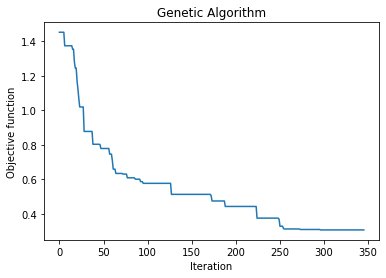

In [82]:
model.run()

O modelo escolhido possui os parâmetros padrões do pacote.

In [83]:
model.param

{'crossover_probability': 0.5,
 'crossover_type': 'uniform',
 'elit_ratio': 0.01,
 'max_iteration_without_improv': None,
 'max_num_iteration': None,
 'mutation_probability': 0.1,
 'parents_portion': 0.3,
 'population_size': 100}

# Solução

Chegamos que a dieta recomendada é a seguinte:

In [84]:
resultado = [0.1926909,  0.01680871, 0.02535929, 0.0775994,  0.05020181, 0.07130818,
             0.01180005, 0.0365422,  0.00404959, 0.0011334,  0.02774882, 0.00750964,
             0.01744515, 0.00561045, 0.00553345, 0.00975975, 0.0818454,  0.02228306,
             0.036049,   0.16574558, 0.00376287, 0.01462897, 0.08876319]

alimentos = kcal.columns

print("====================== Dieta ====================== ")

for indice, item in enumerate(alimentos):
  print ("{} : {} Kcal".format(item,round(resultado[indice],3)))

====================== Dieta ====================== 
Alcoholic Beverages : 0.193 Kcal
Animal Products : 0.017 Kcal
Animal fats : 0.025 Kcal
Aquatic Products, Other : 0.078 Kcal
Cereals - Excluding Beer : 0.05 Kcal
Eggs : 0.071 Kcal
Fish, Seafood : 0.012 Kcal
Fruits - Excluding Wine : 0.037 Kcal
Meat : 0.004 Kcal
Milk - Excluding Butter : 0.001 Kcal
Miscellaneous : 0.028 Kcal
Offals : 0.008 Kcal
Oilcrops : 0.017 Kcal
Pulses : 0.006 Kcal
Spices : 0.006 Kcal
Starchy Roots : 0.01 Kcal
Stimulants : 0.082 Kcal
Sugar Crops : 0.022 Kcal
Sugar & Sweeteners : 0.036 Kcal
Treenuts : 0.166 Kcal
Vegetal Products : 0.004 Kcal
Vegetable Oils : 0.015 Kcal
Vegetables : 0.089 Kcal


In [85]:
model.output_dict

{'function': 0.3072457752743869,
 'variable': array([0.1926909 , 0.01680871, 0.02535929, 0.0775994 , 0.05020181,
        0.07130818, 0.01180005, 0.0365422 , 0.00404959, 0.0011334 ,
        0.02774882, 0.00750964, 0.01744515, 0.00561045, 0.00553345,
        0.00975975, 0.0818454 , 0.02228306, 0.036049  , 0.16574558,
        0.00376287, 0.01462897, 0.08876319])}